In [132]:
# Install panda numpy matblotlib and seaborn
# !pip install pandas numpy matplotlib seaborn

# install openpyxl to  read excel files (.xlsx)
# !pip install openpyxl

In [133]:
# import Pandas as pd and Numpy as np for numerical and data analysis
import numpy as np
import pandas as pd

# import seaborn and matplotlib as plt for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# additional setting to supress warings
import warnings
warnings.filterwarnings('ignore')

### Load the data file source

In [134]:
# load and read dataset file
loan_data = pd.read_csv("loan.csv")

In [135]:
# load dictinary data set
data_dict = pd.read_excel("Data_Dictionary.xlsx")
data_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


### Exploring the data

In [136]:
# check dimension of dataframe
loan_data.shape

(39717, 111)

In [137]:
# view first 5 rows of loan data frame
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [138]:
# get information concise summary about data
loan_data.info(max_cols=len(loan_data.columns)) # explictly mention max_cols to no of cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [139]:
# get columns header name
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [140]:
# check for duplicate rows in dataset
duplicate_row_count = loan_data.duplicated(subset=None, keep='first').count()
print(duplicate_row_count)

# size of loan dataset
total_no_of_rows = len(loan_data)
print(total_no_of_rows)

# if both are equal that implies there is no duplicate
if(total_no_of_rows == duplicate_row_count):
    print("No duplicate rows.")




39717
39717
No duplicate rows.


In [141]:
# check null count 
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Data Cleaning

In [142]:
# removing all columns with null values 
loan_data.dropna(axis=1, how='all', inplace=True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [143]:
# check shape of dataframe
loan_data.shape
## now we have 57 columns and previous we had 111 columns

(39717, 57)

In [144]:
# exploring unique value
# loan_data["pymnt_plan"]
loan_data["pymnt_plan"].unique().sum()
loan_data["pymnt_plan"].is_unique

False

In [145]:
# check is entire column has same value.
# if so, list out those column name
single_valued_columns = []

for column in loan_data.columns:
    if loan_data[column].nunique() == 1: # only one unique value
        single_valued_columns.append(column)

print("Single-valued columns:", single_valued_columns)

Single-valued columns: ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [146]:
# columns with single value which doesn't make much sense or contribute to analysis
single_valued_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [148]:
# removing single valued column as it have very little or no impact
loan_data.drop(single_valued_columns,axis=1, inplace=True)


In [149]:
# display first 5 rows after removal of single valued column
loan_data.head()

# now we have 48 columns left 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [150]:
# name of available colums 
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

##### dropping few more additional columns
some columns are valid only after loan is approved. They are:
- delinq_2yrs
- last_pymnt_d
- total_rec_late_fee
- last_pymnt_amnt
- next_pymnt_d
- revol_bal
- out_prncp
- total_rec_prncp
- total_pymnt
- total_rec_int
- recoveries
- chargeoff_within_12_mths
- collection_recovery_fee
- mths_since_last_record
- mths_since_last_delinq
- last_credit_pull_d



so we can remove these columns are they are not contibuting in decision making of loan application.

Additionally few more columns with   
- `desc` -> has text information and makes more sense for already approved or current loans 
- `memeber_id` -> is also not useful in determining loan
- `out_prncp_inv`  and `total_pymnt_inv` -> is releavent for investors and doesn't impact prediction of loan approval or rejection process.
- `funded_amnt_inv` -> this is the amount commited by investor so can be removed too.
- `url` -> is not relevant in determining loan  as it contains URL for the LC page.
- `id` -> is index variable which has unique values but doesn't help on determining loan approval. 
- `title`, `emp_title` -> are descriptive text or noun does't contibute in analysis.

In [151]:
# droping columns which is vaild post approval of loan
loan_data.drop(["delinq_2yrs",
"last_pymnt_d",
"total_rec_late_fee",
"last_pymnt_amnt",
"next_pymnt_d",
"revol_bal",
"out_prncp",
"total_rec_prncp",
"total_pymnt",
"total_rec_int",
"recoveries",
"collection_recovery_fee",
"mths_since_last_record",
"mths_since_last_delinq",
"out_prncp_inv",
"total_pymnt_inv",
"desc",
"member_id",
"id", 
"title", 
"emp_title",
# "funded_amnt_inv",
"last_credit_pull_d",
"url"], axis = 1, inplace = True)

In [152]:
# check dimension of the loan dataset
loan_data.shape


(39717, 25)

In [153]:
# get name of all columns
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [154]:
# check for concise information summary about data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

In [188]:
# Drop the rows where loan_status is current as there are active loan and is under repayment
loan_df = loan_data[loan_data['loan_status'] != "Current"]

In [189]:
# check of loan status uniqiue values
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [157]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,860xx,AZ,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,309xx,GA,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,606xx,IL,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,917xx,CA,20.00,Feb-96,1,10,0,21%,37,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,852xx,AZ,11.20,Nov-04,3,9,0,28.30%,12,0.0


In [158]:
# check missing values
(loan_df.isna().sum()/len(loan_df.index))*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.129611
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

#### Handle missing values
we have missing values for emp_length, revol_util, pub_rec_bankruptcies.
let's drop missing values for columns less than 2% and fill with mode/median value for greater than 2%.


In [159]:
# check type of emp_length
loan_df["emp_length"].dtypes

dtype('O')

In [160]:
# calculate mode of emp_length
emp_len_mode = loan_df.emp_length.mode()[0]
print("Mode : " + emp_len_mode)

# Diplay count by emp_length
loan_df.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

Now, we can notice that mode value has higher frequency count than next most frequency value. Thus, it will be safe to assign mode value to null and missing values. Also, missing value percentage is very less so it won't make much impact.

In [161]:
loan_df["emp_length"].fillna(emp_len_mode, inplace=True)
loan_df["emp_length"].isna().sum()

np.int64(0)

In [162]:
# drop missing value for revol_util as it's very few and less than 2% 
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True) 
loan_df["revol_util"].isna().sum()

np.int64(0)

In [163]:
# drop missing value for pub_rec_bankruptcies as it's very few and less than 2% 
loan_df.dropna(axis = 0, subset = ['pub_rec_bankruptcies'] , inplace = True) 
loan_df["pub_rec_bankruptcies"].isna().sum()

np.int64(0)

In [164]:
# check shape of dataframe
loan_df.shape

(37830, 25)

In [165]:
# check for concise information summary about data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37830 entries, 0 to 39680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37830 non-null  int64  
 1   funded_amnt           37830 non-null  int64  
 2   funded_amnt_inv       37830 non-null  float64
 3   term                  37830 non-null  object 
 4   int_rate              37830 non-null  object 
 5   installment           37830 non-null  float64
 6   grade                 37830 non-null  object 
 7   sub_grade             37830 non-null  object 
 8   emp_length            37830 non-null  object 
 9   home_ownership        37830 non-null  object 
 10  annual_inc            37830 non-null  float64
 11  verification_status   37830 non-null  object 
 12  issue_d               37830 non-null  object 
 13  loan_status           37830 non-null  object 
 14  purpose               37830 non-null  object 
 15  zip_code              37

#### Data conversion


In [166]:
# loan_amnt and funded_amnt is int64 but better suited type is float so conveting to float64
loan_df = loan_df.astype({'loan_amnt': "float", "funded_amnt":"float"})


In [167]:
# convert term column to integer as it contains month values
loan_df["term"] = loan_df["term"].apply(lambda x: int(x[:-7]))


In [168]:
# Convert int_rate to float by removing the % character at end
loan_df['int_rate'] = loan_df["int_rate"].apply(lambda x: float(x[:-1]))

In [169]:
loan_df.revol_util = pd.to_numeric(loan_df.revol_util.apply(lambda x : x.split('%')[0]))

In [170]:
# convert emp_length to numerical data to get better statistical analysis
loan_df['emp_length'] = loan_df['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})

In [171]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37830 entries, 0 to 39680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37830 non-null  float64
 1   funded_amnt           37830 non-null  float64
 2   funded_amnt_inv       37830 non-null  float64
 3   term                  37830 non-null  int64  
 4   int_rate              37830 non-null  float64
 5   installment           37830 non-null  float64
 6   grade                 37830 non-null  object 
 7   sub_grade             37830 non-null  object 
 8   emp_length            37830 non-null  int64  
 9   home_ownership        37830 non-null  object 
 10  annual_inc            37830 non-null  float64
 11  verification_status   37830 non-null  object 
 12  issue_d               37830 non-null  object 
 13  loan_status           37830 non-null  object 
 14  purpose               37830 non-null  object 
 15  zip_code              37

In [258]:
# Convert issue_d column from object to DateTime
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

In [265]:
# Adding additional column for Year and Month for analysis extrating Year and Month from issue_d
loan_df['issue_year'] = pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_month'] = pd.DatetimeIndex(loan_df['issue_d']).month

#### Check for Outlier

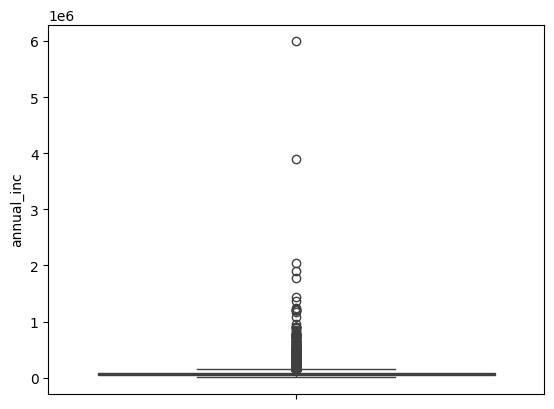

In [174]:
sns.boxplot(loan_data['annual_inc'])
plt.show()

In [175]:
# the above diagram clearly shows presence of outliers
# check quantile info
quant_info = loan_df["annual_inc"].quantile([0.5, 0.2, 0.50,0.75,0.90, 0.95, 0.97,0.98, 0.99])
quant_info

0.50     59000.0
0.20     37440.0
0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    186000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [176]:
# values above 98 percentile seems to be disconnected
# taking threshold has 0.98
annual_inc_per_98 = loan_df['annual_inc'].quantile(0.98)
loan_df = loan_data[loan_data.annual_inc <= annual_inc_per_98]

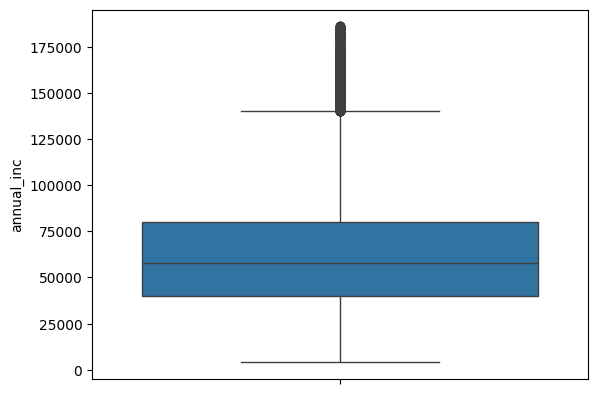

In [177]:

# show boxplot for annual_inc
sns.boxplot(loan_df.annual_inc)
plt.show()

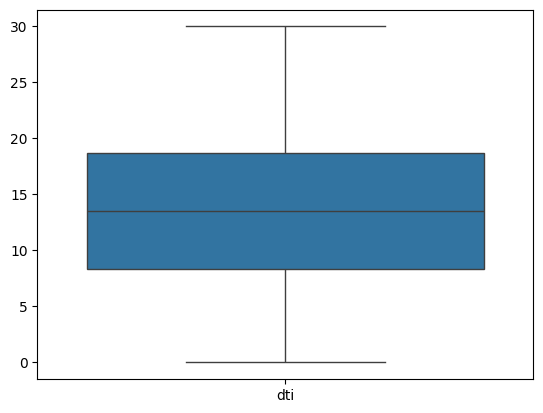

In [178]:
# analize dti
sns.boxplot([loan_df.dti])
plt.show()

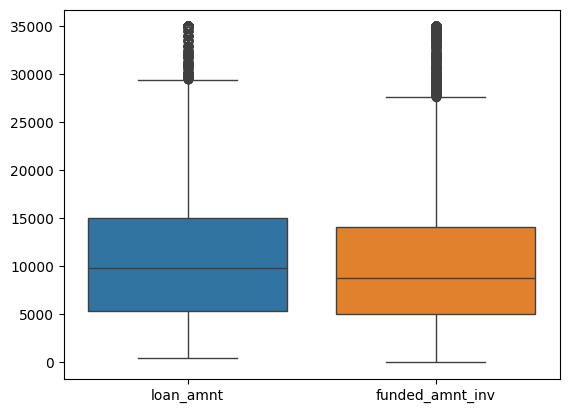

In [179]:
# draw boxplot for loan_amnt and funded_amnt_inv
sns.boxplot([loan_df.loan_amnt,loan_df.funded_amnt_inv])
plt.show()

we can see some vaules are bit outside Q3 distibution, still distibution looks continuous and there is no need to remove these values. 

#### Validation

In [293]:
# check for loan_amnt summary
loan_df['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [294]:
# Bucketting Loan Amount
def bucket_loan_amount(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K' 
    elif (column >15000) and (column <= 20000):
        return '15K - 20K' # 75% quartile 
    else:
        return '20K - above' 
    
loan_df['bucket_loan_amount'] = loan_df.apply(lambda x : bucket_loan_amount(x['loan_amnt']), axis = 1)



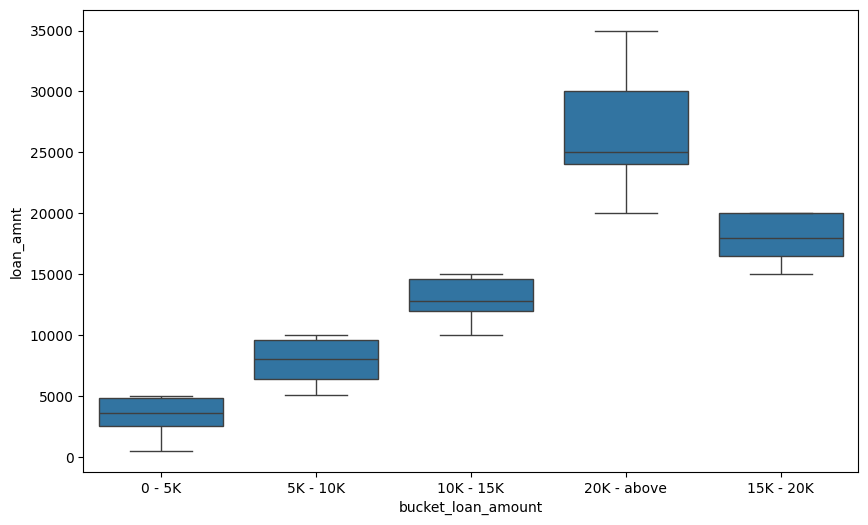

In [296]:
# Plot boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=loan_df.bucket_loan_amount, y=loan_df.loan_amnt)
plt.show()

####  Univariate Visualization
##### Categorical

In [190]:
# analyzing loan_status  
loan_df["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

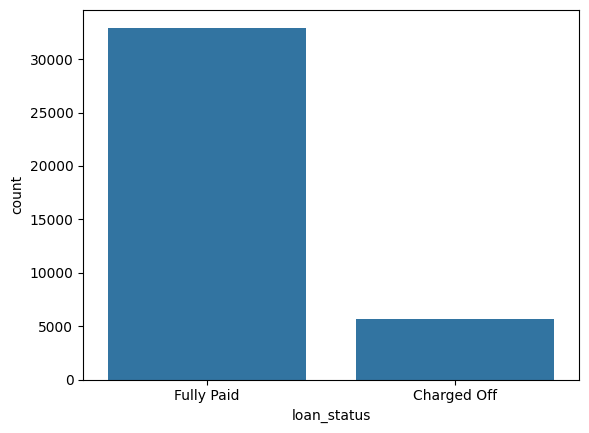

In [208]:
# visualizion
sns.countplot(x = 'loan_status', data = loan_df)
plt.show()

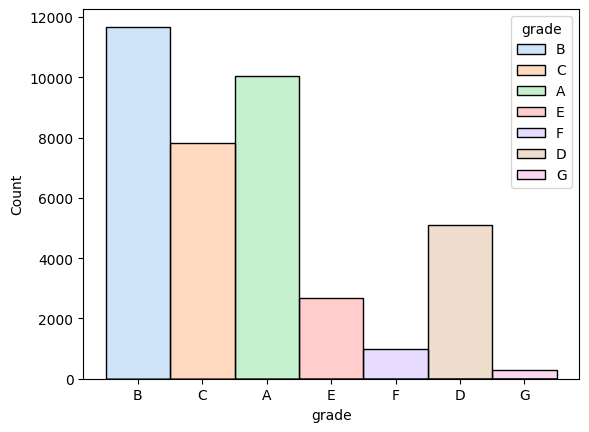

In [297]:
# plot histogram for grade
# loan_df['grade'].value_counts().plot.bar()
sns.histplot(x="grade", data = loan_df, palette="pastel", hue="grade", legend=True )
# sns.color_palette("husl", 9)
plt.show()

- Grade B has highest frequency count of loan application

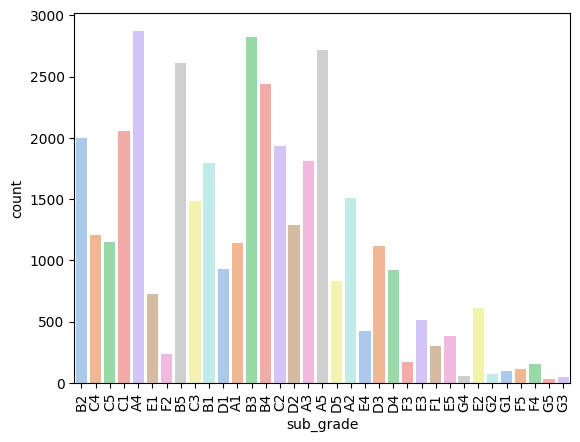

In [300]:
# plot countplot for sub_grade
# loan_df['sub_grade'].value_counts().plot.bar()
sns.countplot(x="sub_grade", data = loan_df , palette="pastel", width=0.8, hue="sub_grade", legend=False)
plt.xticks(rotation=90)
plt.show()

- sub_grade A4 has highest frequency count.

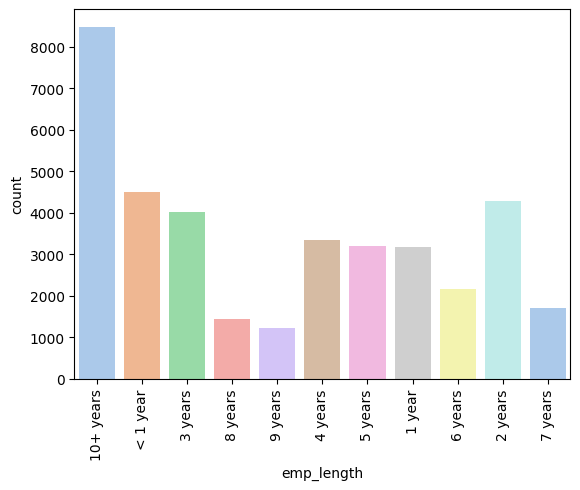

In [301]:

# Plot countplot for emp_length
sns.countplot(x="emp_length", data = loan_df , palette="pastel", width=0.8, hue="emp_length", legend=False)
plt.xticks(rotation=90)
plt.show()

- Majorty of customers are in employment for 10 and more years while next immediate value is for < 1 year. 

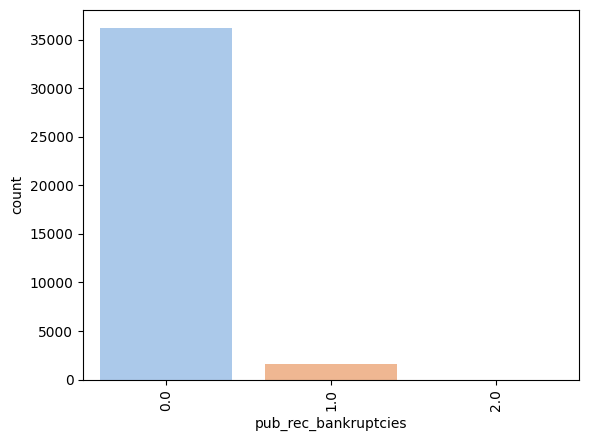

In [304]:
# Plot countplot for pub_rec_bankruptcies 
# sns.countplot(x="pub_rec_bankruptcies", data = loan_df , palette="pastel", width=0.8, hue="emp_length", legend=True)
sns.countplot(x="pub_rec_bankruptcies", data = loan_df , palette="pastel", width=0.8)
plt.xticks(rotation=90)
plt.show()

- Most of the customers who applied for loans are not in public record of bankruptcies.

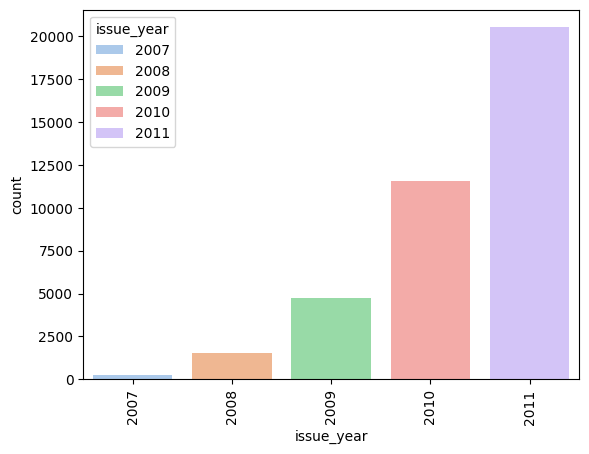

In [263]:
# Plot frequency count for loan issued by year
sns.countplot(x="issue_year", data = loan_df , palette="pastel", width=0.8, hue="issue_year", legend=True)
plt.xticks(rotation=90)
plt.show()

- Number of approved loans are inceasing each year and year 2011 has the max loan approved.

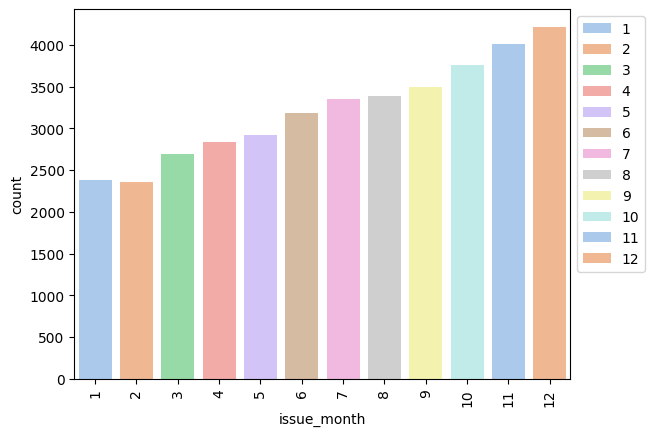

In [268]:
# Plot frequency count for loan issued by month
sns.countplot(x="issue_month", data = loan_df , palette="pastel", width=0.8, hue="issue_month", legend=True)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

- The is some trend is loan approval. Feb has slightly less no of loans approved while approved loan counts incerease each month and December has the highest value.

In [273]:
# analyze home or mortgage ownership
loan_df["home_ownership"].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [274]:
# there is only 3 none value so we can replace it with other
loan_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

# check unique values for home_ownership again
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

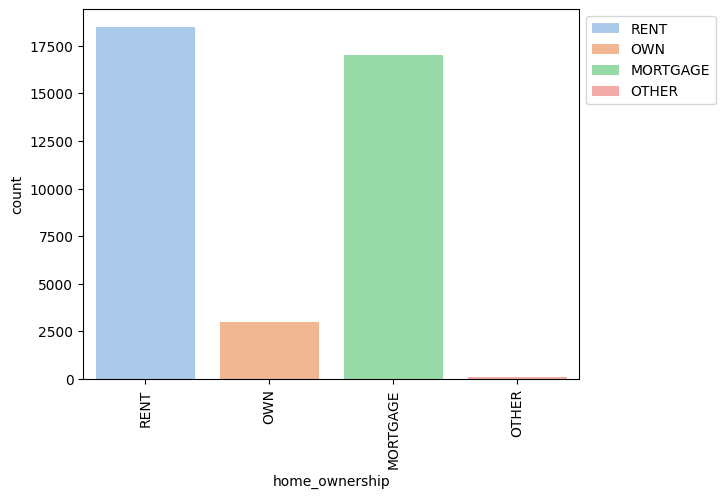

In [275]:
# plot countplot for house_ownership
sns.countplot(x="home_ownership", data = loan_df , palette="pastel", width=0.8, hue="home_ownership", legend=True)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

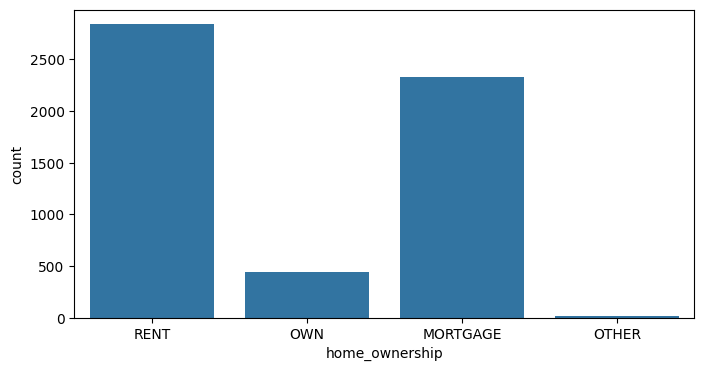

In [287]:
fig, ax = plt.subplots(figsize = (8,4))
sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

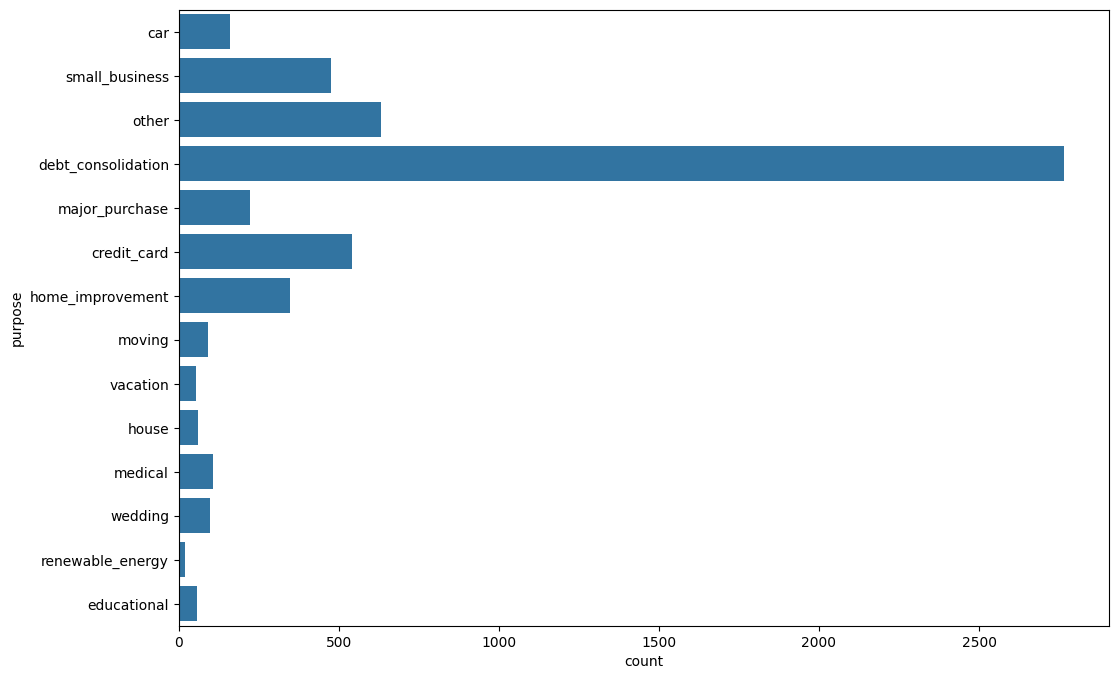

In [292]:
# analyze purpose column
fig, ax = plt.subplots(figsize = (12,8))
# ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.show()

In [182]:
# summary dataset distibution
loan_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
count,38914.000000,38914.000000,38914.000000,38914.000000,38914.000000,38914.000000,38914.000000,38914.000000,38914.000000,38914.000000,38239.000000
mean,11058.455826,10793.888446,10253.245583,319.820404,64065.255369,13.411601,0.864907,9.252814,0.055661,21.927635,0.043803
std,7321.870802,7056.357814,6998.089801,204.376309,32322.452828,6.662913,1.066263,4.384440,0.238391,11.322505,0.205553
min,500.000000,500.000000,0.000000,15.690000,4000.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000
25%,5381.250000,5200.000000,5000.000000,165.700000,40000.000000,8.310000,0.000000,6.000000,0.000000,13.000000,0.000000
50%,9800.000000,9600.000000,8814.522994,277.425000,57996.000000,13.510000,1.000000,9.000000,0.000000,20.000000,0.000000
75%,15000.000000,15000.000000,14050.000000,422.330000,80000.000000,18.680000,1.000000,12.000000,0.000000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,186000.000000,29.990000,8.000000,44.000000,4.000000,90.000000,2.000000


In [185]:
# check for concise information summary about data
#loan_data.info()
loan_data.isnull().sum()>39700

loan_amnt               False
funded_amnt             False
funded_amnt_inv         False
term                    False
int_rate                False
installment             False
grade                   False
sub_grade               False
emp_length              False
home_ownership          False
annual_inc              False
verification_status     False
issue_d                 False
loan_status             False
purpose                 False
zip_code                False
addr_state              False
dti                     False
earliest_cr_line        False
inq_last_6mths          False
open_acc                False
pub_rec                 False
revol_util              False
total_acc               False
pub_rec_bankruptcies    False
dtype: bool

#### Important columns
With given columns, we can separate out demogaphics and loan attibutes which will act as predictors. These attibutes can be utilized at the time of desion making to pass or reject a loan of customers. 

*Demographics of cutomer*
- home_ownership
- addr_state
- annual_inc
- emp_length
- emp_title
- zip_code
- dti


*Loan attibutes*
- loan_amt
- grade
- sub_grade
- purpose
- revol_bal
- percent_bc_gt_75
- num_tl_op_past_12m
- mort_acc
- inq_last_12m
- verification_status
- total_acc
- tot_cur_bal
- issue_date
- int_rate
- installment
- public_rec
- public_rec_bankruptcy
